## Introduction
Welcome to the fascinating world of Locally Linear Embedding (LLE), a vital tool within our dimensionality reduction toolbox. Unlike linear techniques like Principal Component Analysis (PCA), LLE shines in preserving local properties when dealing with high-dimensional data.

In this lesson, we'll unravel the algorithm behind LLE, discuss its uses, and reveal how it offers unique insights compared to techniques like PCA. We'll use Python and libraries like numpy, matplotlib, and sklearn to illustrate these concepts.

Prepare to dive in and explore the depths of LLE!

## What is Locally Linear Embedding and it's Use Cases?
LLE stands in the spotlight for its prowess in preserving relationships within local neighborhoods while reducing high-dimensional data. It captures the twists and turns within our data.

An intuitive example would be comparing a street map, which undergoes a reduce-in-size transformation. PCA would distort local structures, much like a bird's eye view would misrepresent the distances between landmarks. LLE, however, keeps the local distances intact, preserving the neighborhood structure just as well in the reduced version.

LLE performs notably well while navigating through data with intricate, non-linear structures. When handling high-dimensional data such as facial image feature extractions or genomics data, the LLE technique proves to be quite beneficial. But remember: the technique does require the appropriate tuning of its hyperparameters.

## Understanding the Theory Behind LLE

Let's delve deeper into understanding the theoretical underpinnings of the LLE algorithm. In a nutshell, the LLE algorithm can be conceptualized as solving an optimization problem in two steps to minimize the error between manifolds in high dimensional and low dimensional spaces.

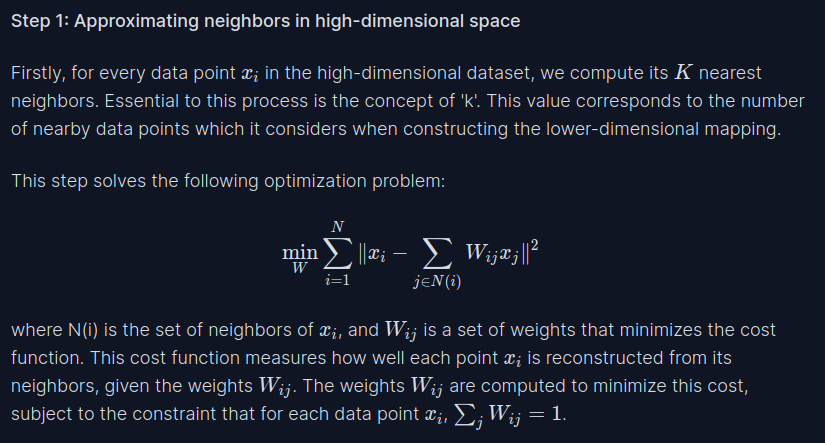

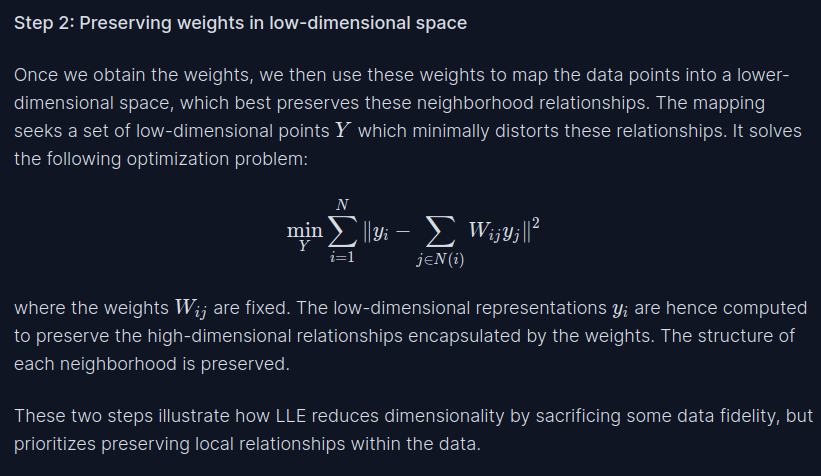

By maintaining local properties, LLE effectively captures non-linear structures and distinguishes itself from linear methods such as PCA. Leveraging these local relationships can provide us with a better understanding of high-dimensional data, which is particularly beneficial in fields such as machine learning, computer vision, and bioinformatics. Now that we’ve gained a more profound insight into LLE let’s proceed and see it in practice.

## Breaking down the LLE Algorithm: Generating the Data
The algorithm of LLE can be summarized into three main steps: identifying neighbors, reconstructing with linear weights, and mapping to lower dimensions.

To illustrate these steps, we're employing a popular choice in visualizing non-linear dimensionality reduction techniques—the Swiss Roll dataset. Let’s generate the Swiss Roll data first:

In [1]:
import numpy as np
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt

# Generate Swiss Roll data
n_samples = 1500
noise = 0.05
X, color = make_swiss_roll(n_samples=n_samples, noise=noise, random_state=42)

The `make_swiss_roll` function generates a Swiss Roll dataset — a dataset which, naturally, cannot be correctly flattened using linear techniques like PCA. Swiss Roll is a set of data points that form a 3D spiral when plotted, making it an ideal candidate for non-linear dimensionality reduction techniques like LLE.

The `n_samples` parameter determines the number of data points in the dataset, while noise adds random `noise` to the data points. The `random_state` parameter ensures reproducibility of the data. We can now visualize the Swiss Roll data:

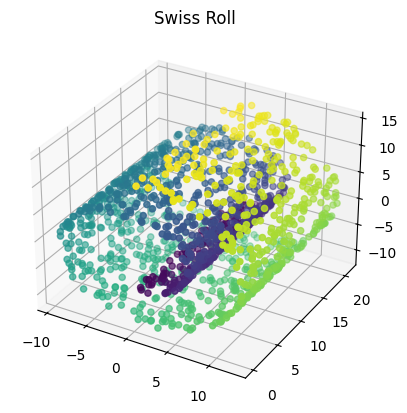

In [2]:
# Plottting the Swiss Roll
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.viridis)
plt.title("Swiss Roll")
plt.show()

## Applying Locally Linear Embedding

Let's now apply LLE to our Swiss Roll data. We are using 12 neighbors for each point and seeking a 2-dimensional output:

In [3]:
from sklearn.manifold import LocallyLinearEmbedding

# Apply Locally Linear Embedding
n_neighbors = 12
n_components = 2
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, random_state=42)
X_reduced = lle.fit_transform(X)

In the above code, n_components=2 is used to reduce the data to 2 dimensions. The n_neighbors=12 parameter is essential here. This is the number of neighbors for each data point to consider when performing the embedding.

The parameter n_neighbors effectively determines the size of the local neighborhood. A low value will limit the number of neighbors and may miss broader trends in the data, while a high value could incorporate too much of the data structure, potentially including noise.

As such, careful tuning of n_neighbors is necessary to maintain a balance between preserving local data distinctions and recognizing larger dataset patterns.

Lastly, embedding.fit_transform(X) is used to fit the model with X, then applies the dimensionality reduction on X. The transformed data is stored in X_reduced.

Again, remember that careful selection of the number of neighbors, n_neighbors, is pivotal in capturing the correct local and global structures within your data.

This transformed data can then be used for subsequent machine learning tasks, offering potential improvements in computation time and algorithm performance.

## Applying PCA for Comparison

For comparison, we will also apply PCA on the same Swiss Roll data:

In [4]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=n_components, random_state=42)
X_pca = pca.fit_transform(X)

PCA represents a linear technique that contrasts with the non-linear nature of LLE, allowing us to spotlight the unique advantages of each method.

## Data Visualization
Now, let's visualize our original data, relegated data from LLE, and data steeped through PCA side-by-side:

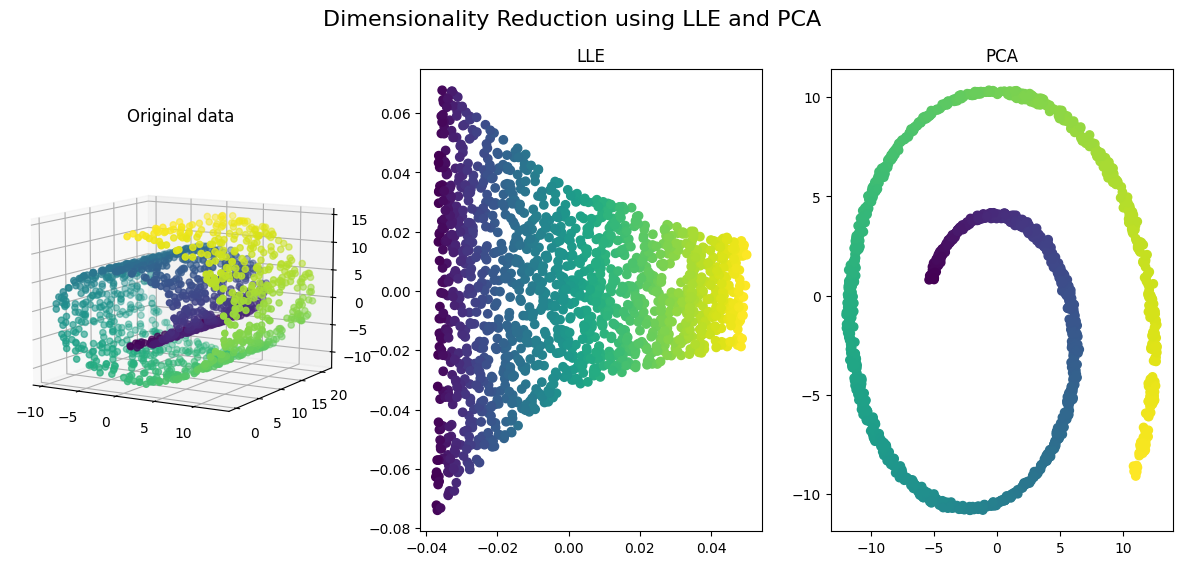

In [5]:
import matplotlib.pyplot as plt

# Visualize the original data and the results after applying LLE and PCA
fig = plt.figure(figsize=(15, 6))
fig.suptitle("Dimensionality Reduction using LLE and PCA", fontsize=16)

# Original data
ax = fig.add_subplot(131, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.viridis)
ax.view_init(10, -60)
ax.set_title("Original data")

# Data after LLE
ax = fig.add_subplot(132)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=color, cmap=plt.cm.viridis)
ax.set_title("LLE")

# Data after PCA
ax = fig.add_subplot(133)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap=plt.cm.viridis)
ax.set_title("PCA")

plt.show()

The visual coparison might not be as clear for the eye, but the LLE method has successfully unfolded the Swiss Roll data into a 2D plane, preserving the local relationships within the data. PCA, on the other hand, has compressed the data into a 2D plane, losing the local relationships in the process. We can confirm this by comparing the reconstruction errors of LLE and PCA.

Note: The plots might vary slightly due to version differences in the libraries.



## Comparing Reconstruction Errors
Finally, we compare the reconstruction errors of LLE and PCA. The reconstruction error represents the error in approximating the actual data points, with a lower value implying a better approximation:

In [6]:
# Compare the reconstruction error of LLE and PCA
lle_reconstruction_error = lle.reconstruction_error_
pca_reconstruction_error = np.sum(pca.explained_variance_ratio_)
print(f"LLE Reconstruction Error: {lle_reconstruction_error}") # ~8.5 x 10^-8
pca_reconstruction_error = 1 - np.sum(pca.explained_variance_ratio_)
print(f"PCA Reconstruction Error: {pca_reconstruction_error}") # ~0.28 the error values may vary slightly due to randomness

LLE Reconstruction Error: 8.556413941505893e-08
PCA Reconstruction Error: 0.28655308888262887


Our results further confirm the effectiveness of LLE compared to PCA for this specific dataset.


## Lesson Summary and Practice
Congratulations! You've just immersed yourself into the complex landscape of LLE and its comparison with PCA. You have also seen how this knowledge can be applied practically in the context of the Swiss Roll dataset, a common benchmark for non-linear techniques.

Stepping into the practice zone now will help consolidate your newfound understanding. We're excited for you to dive deeper into non-linear dimensionality reduction techniques—and beyond. Happy learning!



## Unfolding the Swiss Roll with LLE

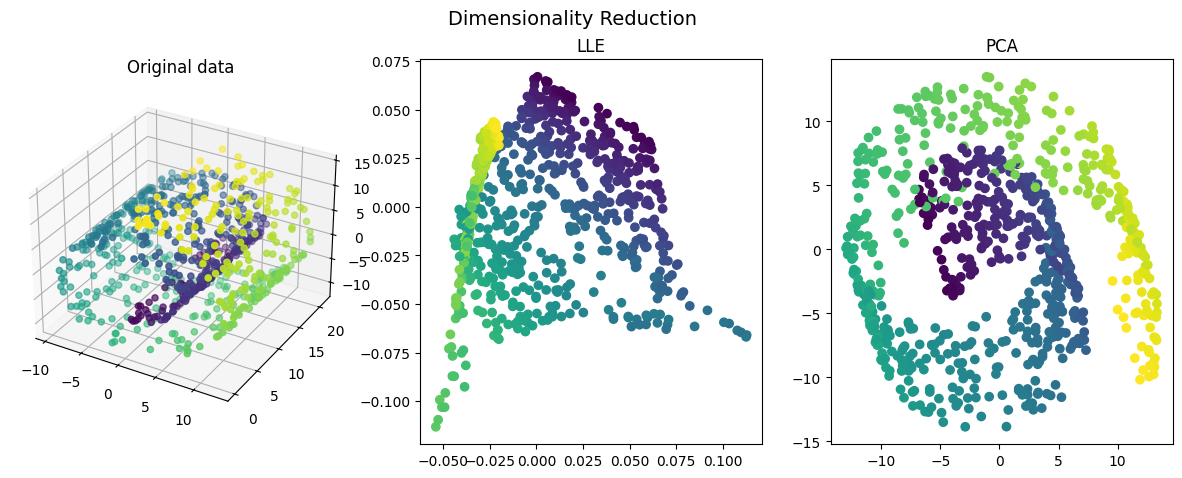

LLE Reconstruction Error: 1.465937083255787e-08
PCA Reconstruction Error: 0.2868672790506135


In [7]:
import numpy as np
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

n_samples = 800
noise = 0.1
X, color = make_swiss_roll(n_samples=n_samples, noise=noise)

n_neighbors = 8
n_components = 2
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components)
X_reduced = lle.fit_transform(X)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

fig = plt.figure(figsize=(15, 5))
fig.suptitle("Dimensionality Reduction", fontsize=14)

ax = fig.add_subplot(131, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color)
ax.set_title("Original data")

ax = fig.add_subplot(132)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=color)
ax.set_title("LLE")

ax = fig.add_subplot(133)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=color)
ax.set_title("PCA")

plt.show()

lle_reconstruction_error = lle.reconstruction_error_
pca_reconstruction_error = 1 - np.sum(pca.explained_variance_ratio_)
print(f"LLE Reconstruction Error: {lle_reconstruction_error}")
print(f"PCA Reconstruction Error: {pca_reconstruction_error}")

## Adjusting the Number of Neighbors in LLE

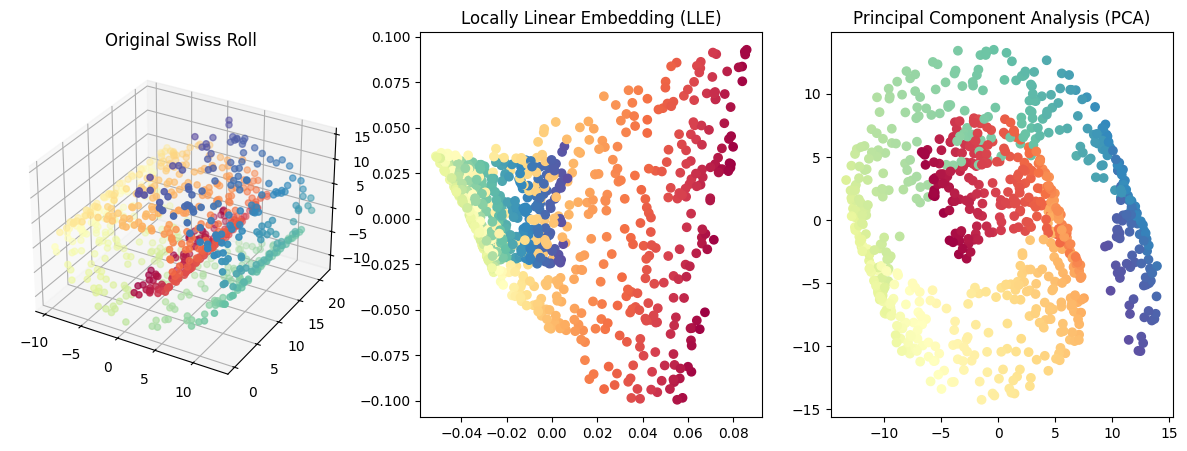

LLE Reconstruction Error: 3.5918669673055454e-07
PCA Reconstruction Error: 0.2840256082672865


In [9]:
import numpy as np
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Generate the Swiss Roll data with fewer samples for better visibility
n_samples = 800
noise = 0.1
X, color = make_swiss_roll(n_samples=n_samples, noise=noise, random_state=42)

# Apply Locally Linear Embedding with 10 neighbors
n_neighbors = 15
n_components = 2
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, random_state=42)
X_reduced = lle.fit_transform(X)

# Compare with PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Visualize the data
plt.figure(figsize=(15, 5))
ax1 = plt.subplot(131, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax1.set_title("Original Swiss Roll")
ax2 = plt.subplot(132)
ax2.scatter(X_reduced[:, 0], X_reduced[:, 1], c=color, cmap=plt.cm.Spectral)
ax2.set_title("Locally Linear Embedding (LLE)")
ax3 = plt.subplot(133)
ax3.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap=plt.cm.Spectral)
ax3.set_title("Principal Component Analysis (PCA)")
plt.show()

# Compare the reconstruction error of LLE and PCA
lle_reconstruction_error = lle.reconstruction_error_
pca_reconstruction_error = 1 - np.sum(pca.explained_variance_ratio_)
print(f"LLE Reconstruction Error: {lle_reconstruction_error}")
print(f"PCA Reconstruction Error: {pca_reconstruction_error}")

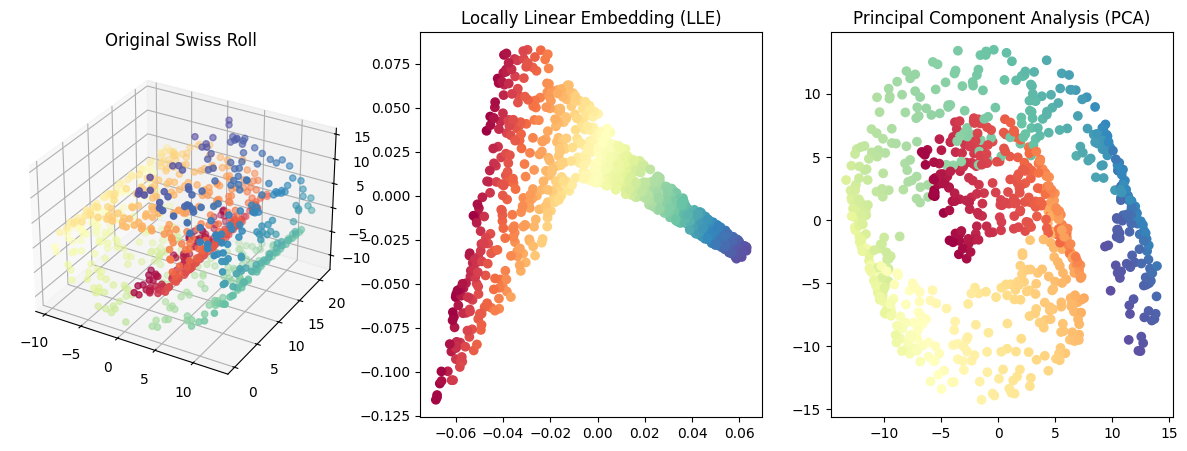

## Squish the Cosmic Data: Tuning LLE Parameters

We've traveled far, Space Voyager, but there are more galaxies to map! This time, your objective is to set the LLE hyperparameters and then print the reconstruction error. This will show us how well we can preserve the local structure of our data points in lower dimensions.

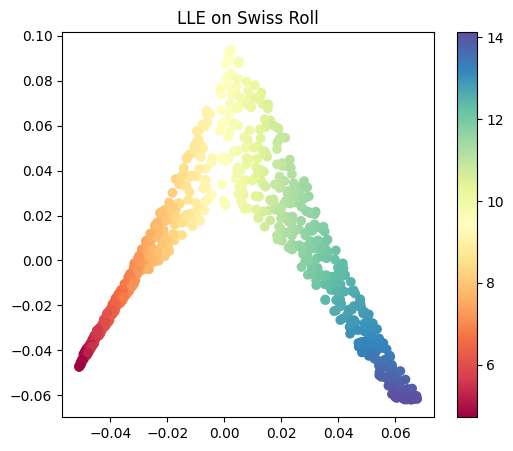

Reconstruction error for LLE: 0.0000


In [10]:
import numpy as np
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt

# Generate Swiss Roll data
n_samples = 800
noise = 0.1
X, color = make_swiss_roll(n_samples=n_samples, noise=noise)

# Apply Locally Linear Embedding (LLE)
n_neighbors = 10
n_components = 2
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components)
X_reduced_lle = lle.fit_transform(X)

# Visualize the results
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)
scatter = ax.scatter(X_reduced_lle[:, 0], X_reduced_lle[:, 1], c=color, cmap=plt.cm.Spectral)
ax.set_title("LLE on Swiss Roll")
plt.colorbar(scatter)
plt.show()

# Print the reconstruction error for LLE
reconstruction_error = lle.reconstruction_error_
print("Reconstruction error for LLE: {:.4f}".format(reconstruction_error))
